In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
import keras
import tensorflow as tf

# import the libraries
import h5py
import os
import pandas as pd
import numpy as np

import urllib
import glob
import pickle
import re

from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential
from sklearn import datasets
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping

# Use the Azure Machine Learning data collector to log various metrics
from azureml.logging import get_azureml_logger
run_logger = get_azureml_logger()
run_logger.log('amlrealworld.predictivemaintenanceforpm.modelbuildingandevaluation','true')

ModuleNotFoundError: No module named 'azureml.logging'

In [6]:
df= pd.read_csv('E:\Minor Project\omlstreaming-grc-datasets-pred-maintenance-892dd65\predictive-maintenance-dataset.csv')

In [7]:
df

,ball-bearing;humidity;vibration
0,93.744;73.999;18
1,93.74;73.999;18.001
2,93.736;73.998;18.002
3,93.732;73.998;18.003
4,93.729;73.998;18.004
...,...
111996,20.186;73.992;2.001
111997,20.186;73.992;20.008
111998,20.185;73.992;20.005
111999,20.185;73.992;20.003


In [8]:
il=[]
l=[]
time=[]

In [9]:
for x in range(112001):
    time.append(x)
    l.append(df["ball-bearing;humidity;vibration"][x].split(';'))

In [10]:
for i in range(112001):
    l[i][0]=l[i][0].replace(" ","")
    l[i][1]=l[i][1].replace(" ","")
    l[i][2]=l[i][2].replace(" ","")

In [11]:
il = np.array(il, dtype=np.float32)
l = np.array(l, dtype=np.float32)

In [12]:
p=[]
for j in range(112001):
    p.append(l[j][0])

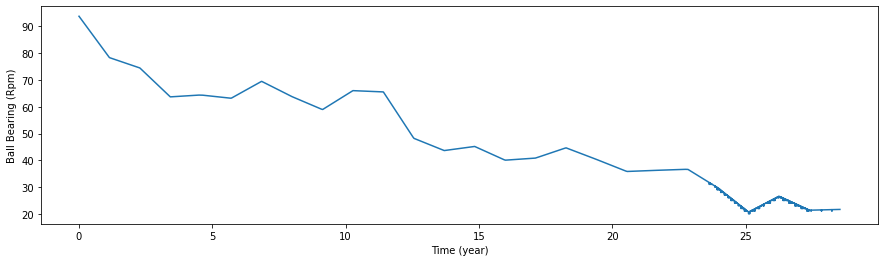

In [13]:
import matplotlib.pyplot as plt
p=[]
time=[]
labels = [0,5, 10,15,20,25,30]
for j in range(100001):
    p.append(l[j][0])
    time.append(j)
plt.figure(figsize=(15,4))

plt.plot(time,p)

plt.ylabel('Ball Bearing (Rpm)')
plt.xlabel('Time (year)')

plt.xticks(np.arange(min(time), max(time)+1, 17520),labels )
plt.show()

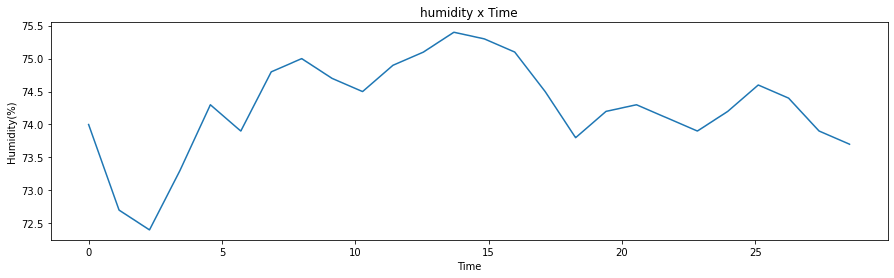

In [14]:
qwe=[]
time=[]
labels = [0,5, 10,15,20,25,30]
for j in range(100001):
    qwe.append(l[j][1])
    time.append(j)
plt.figure(figsize=(15,4))
plt.plot(time,qwe)
plt.ylabel('Humidity(%)')
plt.xlabel('Time')
plt.title('humidity x Time')
plt.xticks(np.arange(min(time), max(time)+1, 17520),labels )
plt.show()

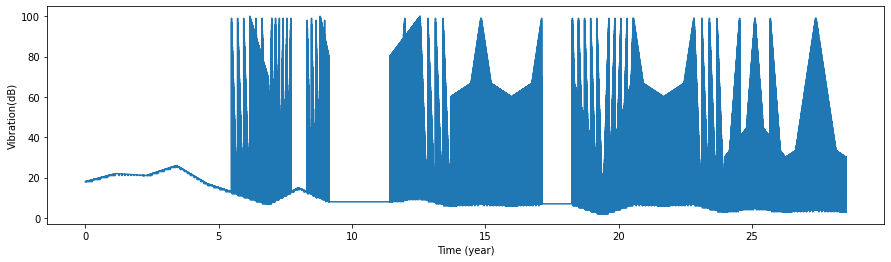

In [37]:
lod=[]
time=[]
labels = [0,5, 10,15,20,25,30]
for j in range(100001):
    lod.append(l[j][2])
    time.append(j) 
plt.figure(figsize=(15,4))
plt.plot(time,lod)
plt.ylabel('Vibration(dB)')
plt.xlabel('Time (year)')



plt.xticks(np.arange(min(time), max(time)+1, 17520),labels )
plt.show()

In [16]:

lod=[]
time=[]
labels = [1,2, 3,4,5,6,7,8,9,10,11,12,13]
for j in range(300):
    lod.append(data['Distance'][j])
    time.append(j) 
plt.figure(figsize=(15,4))
plt.plot(time,lod)
plt.ylabel('Distance (Feet)')
plt.xlabel('Time (Day)')



plt.xticks(np.arange(min(time), max(time)+1, 26),labels )
plt.show()

NameError: name 'data' is not defined

In [17]:
l[0]

array([93.744, 73.999, 18.   ], dtype=float32)

In [18]:
l[i][0]

20.184

In [19]:
type(p[1])

numpy.float32

In [20]:
time.size()

AttributeError: 'list' object has no attribute 'size'

In [21]:
print(str(lod))

[]


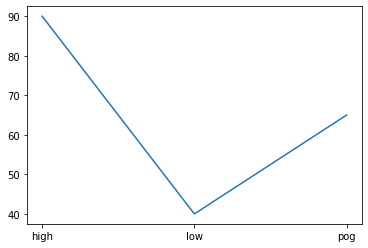

In [22]:
import matplotlib
import matplotlib.pyplot as plt
x = [0,1,2]
y = [90,40,65]
labels = ['high', 'low','pog']
plt.plot(x,y)
plt.xticks(x, labels)
plt.show()

In [23]:
j=0
avg=0
for i in p:
    avg+=i
    j+=1
avg=avg/j
print(avg)
print(j)

49.40977642107276
100001


In [24]:
p[43723]

49.409

In [25]:
output=[]
for i in range(100001):
    if i <= 30607:
        output.append(0)
    elif i > 30607 and i< 61212:
        output.append(1)
    else:
        output.append(2)

NameError: name 'size' is not defined

In [38]:
data=pd.DataFrame({
    'ball-bearing': p,
    'vibration':lod,
    'condition':output
})

In [39]:
data

,ball-bearing,vibration,condition
0,93.744003,18.000000,0
1,93.739998,18.000999,0
2,93.736000,18.002001,0
3,93.732002,18.003000,0
4,93.728996,18.004000,0
...,...,...,...
99996,21.676001,3.001000,2
99997,21.676001,30.007999,2
99998,21.676001,30.004999,2
99999,21.676001,30.003000,2


In [40]:
X=data[['ball-bearing', 'vibration']]
y=data['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
##clf=RandomForestClassifier(n_estimators=4)
clf=RandomForestClassifier(
 max_depth= 3, min_samples_leaf=1,
 min_samples_split=2,n_estimators=20, n_jobs=1)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9386020465984467


In [41]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9386020465984467


No handles with labels found to put in legend.


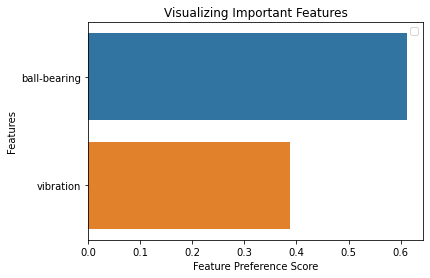

In [42]:
features=['ball-bearing', 'vibration']
target=['0','1','2']
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
feature_imp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Preference Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [43]:
estimator = clf.estimators_[5]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(clf.estimators_[0], 
                out_file='tree.dot', 
                feature_names = features,
                class_names = target,
                rounded = True, proportion = False, 
                precision = 2, filled = True)



In [44]:
print

<function print>

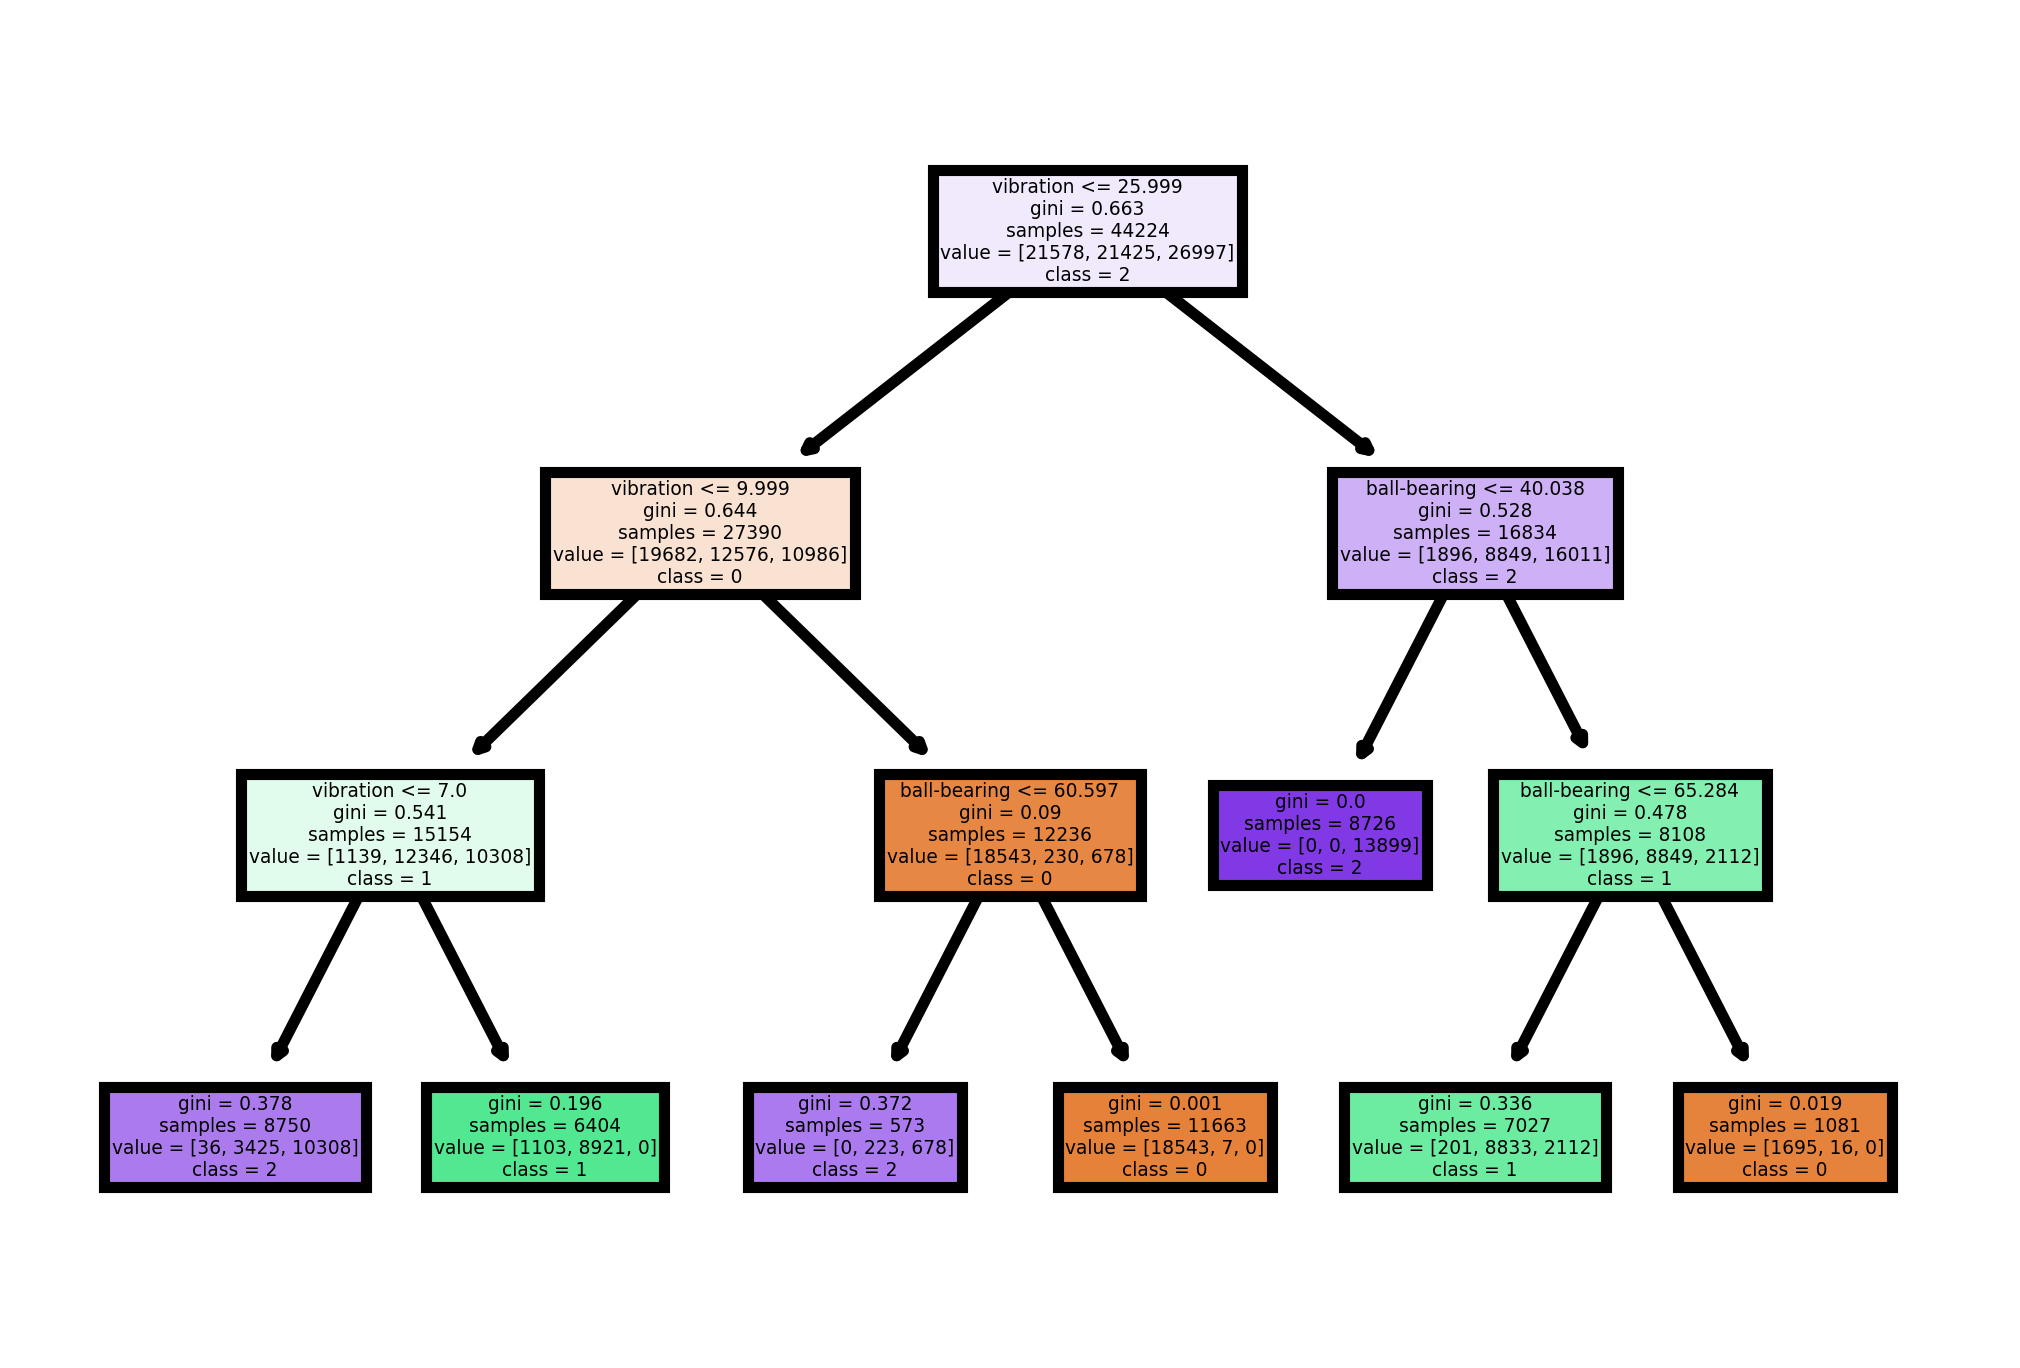

In [45]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,2), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = features,
                class_names = target,
               filled = True);
fig.savefig('rf_individualtree.png')

In [64]:
clf.predict([[12.355999,9.215000]])[0]

2

In [48]:
X_test

,ball-bearing,vibration
76860,36.355999,6.215000
14154,64.045998,21.153999
62628,43.344002,7.000000
61252,42.028999,7.000000
95229,22.389000,38.071999
...,...,...
98850,21.593000,32.875000
40684,62.554001,8.342000
17946,63.778000,14.567000
25870,66.790001,74.000000


# LSTM

In [ ]:
# pick a large window size of 50 cycles
sequence_length = 50

In [ ]:

# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]

In [ ]:
sequence_cols=['ball-bearing','vibration','condition']

In [ ]:
# generator for the sequences
train_df=data
seq_gen = (list(gen_sequence(train_df[train_df['vibration']==id], sequence_length, sequence_cols)) 
           for id in train_df['vibration'].unique())

# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

In [ ]:

# function to generate labels
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [ ]:
# generate labels
label_gen = [gen_labels(train_df[train_df['vibration']==id], sequence_length, ['ball-bearing']) 
             for id in train_df['vibration'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

In [ ]:
# build the network
# Feature weights
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

# LSTM model
model = Sequential()

# The first layer
model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,
         return_sequences=True))

# Plus a 20% dropout rate
model.add(Dropout(0.2))

# The second layer
model.add(LSTM(
          units=50,
          return_sequences=False))

# Plus a 20% dropout rate
model.add(Dropout(0.2))

# Dense sigmoid layer
model.add(Dense(units=nb_out, activation='sigmoid'))

# With adam optimizer and a binary crossentropy loss. We will opimize for model accuracy.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Verify the architecture 
print(model.summary())

In [ ]:
model.fit(seq_array, # Training features
          label_array, # Training labels
          epochs=10,   # We'll stop after 10 epochs
          batch_size=200, # 
          validation_split=0.10, # Use 10% of data to evaluate the loss. (val_loss)
          verbose=1, #
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', # Monitor the validation loss
                                                     min_delta=0,    # until it doesn't change (or gets worse)
                                                     patience=5,  # patience > 1 so it continutes if it is not consistently improving
                                                     verbose=0, 
                                                     mode='auto')])

In [ ]:
train_df['vibration']

In [ ]:
nb_features

In [ ]:
id

In [ ]:
id

# LSTM #2


In [54]:
data = pd.read_excel('E:/Minor Project/project/Final Data.xlsx')

In [ ]:
data

In [ ]:
data = pd.read_excel('E:/Minor Project/project/Final Data.xlsx')
dfinput=data[['ball-bearing','vibration','Distance']]

In [ ]:
dfinput=data[['ball-bearing','vibration','Distance']]

In [ ]:
dfinput

In [ ]:
scaler= MinMaxScaler()
data_scaled= scaler.fit_transform(dfinput)

In [ ]:
data_scaledball=data_scaled[:][0]
data_scaledvib=data_scaled[:][1]
data_scaleddist=data_scaled[:][2]

In [ ]:
data_scaled

In [ ]:
data_scaledball=[]
data_scaledvib=[]
data_scaleddist=[]
for y in data_scaled:
    data_scaledball.append(y[0])
    data_scaledvib.append(y[1])
    data_scaleddist.append(y[2])

In [ ]:
features=data_scaled
target=data_scaled[:,0]

In [ ]:
data_scaledball=np.array(data_scaledball)
data_scaledvib=np.array(data_scaledvib)
data_scaleddist=np.array(data_scaleddist)

TimeseriesGenerator(data_scaledball,data_scaledball, length=10, sampling_rate=1, batch_size=31)[0]

In [ ]:
x_train,x_test, y_train, y_test= train_test_split(data_scaledball, data_scaledball, test_size=0.20,shuffle= False)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], 1))
x_test = np.reshape(x_test, (x_test.shape[0], 1))

In [ ]:
x_test.shape

In [ ]:
win_length=720
batch_size=32
num_features=1
train_generator=TimeseriesGenerator(x_train,x_train, length=win_length, sampling_rate=1,batch_size=batch_size)
test_generator=TimeseriesGenerator(x_test,x_test, length=win_length, sampling_rate=1,batch_size=batch_size)

In [ ]:
train_generator[1]

In [ ]:

model = Sequential()
model.add(LSTM(128,input_shape=(win_length,1),return_sequences=True))
model.add(LeakyReLU(alpha=0.5))
model.add(LSTM(128,return_sequences=True))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.3))
model.add(LSTM(64,return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))



In [ ]:
model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=2,
                                                mode='min')
checkpoint_path = "training_1/cpball.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))



model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history=model.fit(train_generator, epochs=5,
                            validation_data=test_generator,
                            shuffle=False,
                            callbacks=[early_stopping,cp_callback])

In [ ]:
eddd


In [ ]:
y.


In [ ]:
model.evaluate_generator(test_generator,verbose=0)

In [ ]:
pred=model.predict_generator(test_generator)

In [ ]:
pred

In [ ]:
x_test[:,1:][win_length:]

In [ ]:
df_pred=pd.concat([pd.DataFrame(pred),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
rev_trans=scaler.inverse_transform(pred)

rev_trans

In [ ]:
model.evaluate_generator(test_generator,verbose=0)

In [ ]:
pred=model.predict_generator(test_generator)

In [ ]:
pred

In [ ]:
x_test[:,1:][win_length:]

In [ ]:
df_pred=pd.concat([pd.DataFrame(pred),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
rev_trans=scaler.inverse_transform(pred)

In [ ]:
rev_trans

In [ ]:
df_final=dfinput[pred.shape[0]*-1:]

In [ ]:
df_final.count()

In [ ]:
df_final['ball_pred']=rev_trans[:,0]

In [ ]:
df_final

In [ ]:
df_final[['ball-bearing','ball_pred']].plot()

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
scores = model.evaluate(train_generator, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
trainPredict = model.predict(train_generator)
testPredict = model.predict(test_generator)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([train_generator])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([test_generator])

# calculate root mean squared error
trainScore = numpy.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = numpy.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Distance synthetic dataset


In [ ]:
from random import seed
from random import randint
# seed random number generator
# generate some integers
Dista=[]
for _ in range(100001):
	value = randint(0, 400)
	Dista.append(value)

In [ ]:
Dista

In [ ]:
i=0
while i<=100001:
    Dista[i]= randint(0, 5)
    Dista[i+1]= randint(0, 25)
    Dista[i+2]= randint(0, 25)
    Dista[i+3]= randint(0, 25)
    Dista[i+4]= randint(0, 25)
    Dista[i+5]= randint(0, 25)
    i+=24
    

In [ ]:
data=pd.DataFrame({
    'ball-bearing': p,
    'vibration':lod,
    'condition':output,
    'Disatnce':Dista
    
})

In [ ]:
data

# api and OOP modules


In [85]:
import datetime
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import psutil



In [77]:
data = pd.read_excel('E:/Minor Project/project/Final Data.xlsx')
dfinput=data[['ball-bearing','vibration','Distance']]



In [57]:
data

,Unnamed: 0,ball-bearing,vibration,condition,Distance
0,0,93.744003,18.000000,0,2
1,1,93.739998,18.000999,0,6
2,2,93.736000,18.002001,0,21
3,3,93.732002,18.003000,0,12
4,4,93.728996,18.004000,0,1
...,...,...,...,...,...
99996,99996,21.676001,3.001000,2,250
99997,99997,21.676001,30.007999,2,71
99998,99998,21.676001,30.004999,2,270
99999,99999,21.676001,30.003000,2,341


In [82]:
labels = [0,5, 10,15,20,25,30]
def convertstr_time(strdate):
    year,month,day = map(int, strdate.split('/'))
    redate = datetime.datetime(year,month,day)
    return redate

def predictvalueparcing(predict_days,ttinitial):
    ballb=[]
    distii=[]
    time=[]
    labels = [0,5, 10,15,20,25,30]
    for j in range(predict_days*10):
        ballb.append(dfinput['ball-bearing'][ttinitial+j])
        distii.append(dfinput['Distance'][ttinitial+j])
        time.append(j)
    return ballb,distii,time
    

In [83]:
def predicted_duration(origindate, dateinitial, datefinal):
    
    oridate=convertstr_time(origindate)
    inidate=convertstr_time(dateinitial)
    findate=convertstr_time(datefinal)
    
    predict_days=(findate-inidate).days
    ttinitial=(inidate-oridate).days
    
    ball,diss,time=predictvalueparcing(predict_days,ttinitial)
    
    return ball,diss,time


In [ ]:
dfinput['ball-bearing'][0]

In [ ]:
graphplotting('2021/01/01', '2022/06/01', '2022/06/30')

In [ ]:
type(data_canada)

In [ ]:
def plotdistbargraph(origindate, dateinitial, datefinal):

    oridate=convertstr_time(origindate)
    findate=convertstr_time(datefinal)
    daysfrmori=(findate-oridate).days
    tempdiss=dfinput['Distance']
    distvalue=[]
    temp=0
    for i in range(7):
        for j in range(10):
            temp=temp+tempdiss[daysfrmori]
            daysfrmori=daysfrmori-1
        distvalue.append(temp)
        temp=0
    disdf={ 'Distance': [distvalue[0],distvalue[1],distvalue[2],distvalue[3],distvalue[4],distvalue[5],distvalue[6]],
            'Day': ['Monday', 'Tuesday', 'Wednesday','Thurday','Friday','Saturday','Sunday']
          } 
    fig = px.bar(disdf, x='Day', y='Distance')
    pio.write_image(fig, 'image/Bargraph.png')

2

In [ ]:
plotdistbargraph('2021/01/01', '2021/06/01', '2025/06/30')

In [ ]:
def graphplotting(origindate, dateinitial, datefinal):
    
    ball,diss,time=predicted_duration(origindate, dateinitial, datefinal)
    inidate=convertstr_time(dateinitial)
    findate=convertstr_time(datefinal)
    oridate=convertstr_time(origindate)
    ttdays=(findate-inidate).days
    ttinitial=(inidate-oridate).days
    datte=[]
    ballbb=[]
    for i in range(ttdays*10):
        datte.append(inidate)
        ballbb.append(dfinput['ball-bearing'][ttinitial])
        ttinitial=ttinitial+1
        inidate=inidate+datetime.timedelta(hours=2,minutes=24)
    graphdf={ 'Ball Bearing': ballbb,
            'Day': datte
          } 
    fig = px.line(graphdf, x='Day', y='Ball Bearing')
    fig.show()

In [ ]:
graphplotting('2021/01/01', '2021/01/02', '2045/12/30')

In [ ]:
j+datetime.timedelta(days=1)

In [ ]:
graphplotting('2021/01/01', '2021/06/01', '2021/12/30')

In [165]:
data=pd.DataFrame({
        'ball-bearing': data['ball-bearing'],
        'vibration': data['vibration'],
        'condition': data['condition']
    })   

def model_variablereturn():
    X=data[['ball-bearing', 'vibration']]
    y=data['condition']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    ##clf=RandomForestClassifier(n_estimators=4)
    clf=RandomForestClassifier(
    max_depth= 3, min_samples_leaf=1,
    min_samples_split=2,n_estimators=20, n_jobs=1)
    clf.fit(X_train,y_train)    
    return clf

In [164]:
clf=model_variablereturn()
clf.predict([[60.355999]])[0]  

1

In [80]:
dfinput['ball-bearing'][]

93.74400329589844

In [166]:

clf=model_variablereturn()

def oppredmodel(origindate, dateinitial, datefinal):
    oridate = convertstr_time(origindate)
    inidate = convertstr_time(dateinitial)
    findate = convertstr_time(datefinal)
    datapoint=((findate-oridate).days)*10
    vi=dfinput['vibration'][datapoint]
    ballb=dfinput['ball-bearing'][datapoint]
    print(clf.predict([[ballb,vi]])[0])
oppredmodel('2021/01/01', '2021/01/01', '2021/02/01')

18.30999946594238
92.5479965209961
0


In [190]:
oppredmodel('2021/01/01', '2021/01/01', '2045/01/01')

83.0
21.45499992370605
2


In [154]:
oridate = convertstr_time(origindate)
    inidate = convertstr_time(dateinitial)
    findate = convertstr_time(datefinal)
    datapoint=((findate-oridate).days)*10
    vi=dfinput['vibration'][datapoint]
    ballb=dfinput['ball-bearing'][datapoint]

IndentationError: unexpected indent (<ipython-input-154-f848d9099d41>, line 2)